# Bayes Intro Lab: review of distributions

Building Bayesian models requires us to utilize common probability models for the likelihood function. These will include the usual suspects of binomial, Bernoulli, Cauchy, chi-squared, poison etc.


|     Distribution  | Probability Mass Function (The Formula)  | Written Description 
|:-:|---|---|
| Uniform  | $\frac{1}{n}$ |  Basically, a uniform distribution is utilized when you're selecting any one member of a set is just as likely as any other  |
| Bernoulli   | $\binom{n}{k}\cdot p^{k}(1-p)^{1-k} $  | Like a coin flip, p represents the probability that event X occurs, and 1-p is the probability that event Y occurs  |
| Poisson | $\frac{e^{-n}n^{x}}{x!}$ | The probability of observing x events in a certain time interval. e is the Euler number and n is a tuning parameter |
| Binomial  | $\binom{n}{k}\cdot p^kq^{n-k} $| Gives you the probability of getting k "success" in n iterations/trials


We'll do a review of counting and combinatorics, then introduce the Beta function.


# A small excursion into counting 

$$ Binom(n,k) = \binom{n}{k} \cdot p^kq^{n-k} $$
Where the binomial coefficient is read "n choose k". You should be familiar with this concept through your previous exposure to basic probability. However, in case you need to jog your memory, I'm going to go through some important properties of counting that are important to giving you a better intuitive grasp at the mechanics of Bernoulli, and hopefully, by extension Bayesian analysis

# Introduction to Factorials and Variations

A factorial is defined as n! = $n*(n-1)*...*1 = \prod_{i=1}^{n} i$
This often use to enumerate all the different possibly of a number of objects as you remove one after you've selected it. 
 
It uses something called the multiplication rule, which can be demonstrated common sensibly by thinking of ordering a Pizza. 
If you order a pizza, and there are 5 types of meats, 3 types of cheese, and 10 types of vegetables, then there are 5* 3 * 10. 

A variation is slightly more complicated (but useful) concept. A variation
 $V = \frac{n!}{(n-k)!} $, and can be thought of as number of all k-element variations "chosen" from a set of n elements.

Q: How many 3 digit numbers can be constructed from the numeral 0,1,2,3,4,5,6,7,8,9?

**Answer:** 



  $9*10*10$
...

# Introduction to Combinations 

We're going a little fast, but we've reached the cul-de-grace for this small aside: The combination formula. A combination $ C =  \frac{n!}{(n-k)! (k!)} $ often denoted symbolically as $\binom{n}{k}$. 

Suppose we had 30 white non-distinct balls distributed to 10 people, with each person receiving one and only one ball. How many ways can this be accomplished such that each individual receives **AT LEAST** one ball?

**Answer:** 

...

As we will see, the phenomena of coin tossing will be directly connected with understanding the number of configurations you have with a small number of non-distinct classes of objects (in this case heads or tails). We will now simulate a simple coin toss with the Bernoulli scheme. 

# Simulating a Simple Fair Coin Toss with Python

We're going to call some methods from scipy stats library. Let me emphasize, what the next following exercises (including those for the rest of this week -or course for that matter), can be accomplished in multiple ways. What we're trying to do is get you familiar with the methods available to you, so that you'll be ready to chain them up together to build your own (more complicated) methods as you mature in data science. 

If you need a review for what a random variable is, please refer to the following: https://www.khanacademy.org/math/probability/random-variables-topic/random-variables-prob-dist/v/discrete-and-continuous-random-variables, being that we are operating on computers, we will be utilizing discrete random variables. 

To start off, we should become familiar with the docs for scipy.stats. Please take some time and browse/read through the following site: http://docs.scipy.org/doc/scipy-0.17.0/reference/stats.html

Scroll down and look through the **discrete distributions.** Read carefully what's there, play close attention to the standard methods attached to each distribution object. 

If you need a quick review of probability distributions go through this quick video here: https://www.youtube.com/watch?v=mrCxwEZ_22o

When you're comfortable with what they do, and how to call them, try the exercises below. Good luck!

#### Exercise 1

Using scipy.stats create a simple vector of 100 coin flips for a fair coin and print the results

In [1]:
# Using Bernoulli to simulate a coin toss
import matplotlib.gridspec as gridspec

from scipy.stats import bernoulli
import numpy as np

prob = .5 # because a coin toss is 50/50
bernol = bernoulli(prob) # the bernoulli function

def bernol_scheme(n):
    return bernol.rvs(n) # n is how many times it flips
print(bernol_scheme(100))



[0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0]


# Building on Bernoulli to construct the Binomial distribution

We're going to force you to explore (and use) some base libraries, like math. Why? Well, with libraries like scipy-stats, there are major benefits, namely they make calculating complicated objects (distributions, rvs, etc.) very easy. Yet, there is a cost, they may limit your freedom (you can only calculate a distribution a certain way possibly), and they bring in dependancies. In your early carrier, you will probably not stumble onto issues of library compatbilities, or "collisions", but dependancies will become important, especailly as you move into the frontier of the data science world. 

Therefore, every data scientist needs to be familiar with the base-libraries, and be prepared to utilize them directly to a problem if need be. 

Please read the following link, like above, read/browse the various methods, and when you're ready. Go ahead and try the following exericse.
https://docs.python.org/2/library/math.html

#### Exercise 2

Write a simple combination function, using only your wits (and maybe the math library in Python - but nothing more)

In [2]:
# Before we proceed with the rest of the lab, we should disect the formula for Bernoulli, the distribution we will be playing 
# with the most. 

#Write the combination formula into Python from scratch. Do not call any combination method from any library!

import math

def combo(n,r):
    return math.factoria(n)/math.factorial(r)/math.factorial(n-r)



#### Exercise 3

Using what you know about Bernoulli, Combinations, and Variations, build the Binomial distribution, plotting, 
(mostly) from scratch, the probability of you making k-heads (or tails) in n trials on a fair coin.


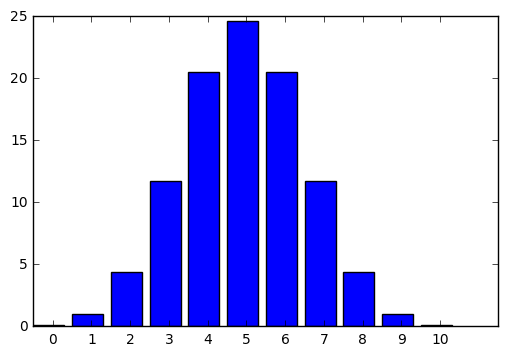

In [3]:
# Hint, try a barplot or histogram with the x-axis accounting for the number of k-heads you want to model for n-trials. 

import math
import pylab
import numpy
import matplotlib.pyplot as plt

n = 10
heads = 0.5; tails = 1 - heads;
comb_series = [1]

def combo(n,r):
    return math.factorial(n)/math.factorial(r)/math.factorial(n-r)

def x_axis_hash(n):
    return [str(x) for x in range (n+1)]

for x in range(1,n+1):
    comb_series = comb_series + [combo(n,x)]
    
prob = []

for x in range(n+1):
    prob = prob + [(comb_series[x]*((heads**x)*(tails**(n-x))))*100]
    
x = numpy.arange(n+1)
plt.bar(x, prob, color="blue")
plt.xticks(x+0.5, x_axis_hash(n))
plt.show()  # Shows the graph of the number of heads for a fair coin after x trials

#### Exercise 4 

Beside Bernoulli/Binomial distributions, we'll be using other distributions and family of distributions while constructing probability or simulation models. Poisson comes up often in Bayesian analysis as well. Use stats model to plot the Poisson distribution in a simple histogram.

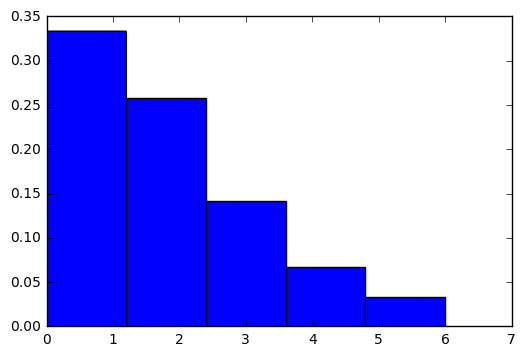

In [4]:

# Use the scipy library to model and plot a Poisson scheme with a trial size of 100, 


from scipy import stats
#from scipy.stats import poisson


import pylab
import numpy
import matplotlib.pyplot as plt

# We will load up Poisson distribution so you can 

poisson_trial = stats.poisson.rvs(mu = 2, loc = 0, size = 100)
plt.figure()
plt.hist(poisson_trial, bins = 5, normed = True)
plt.show()


# The Beta Function 

In the lesson, we discussed the importance of the prior in Bayesian analysis. In common speak, it's basically a person's "beliefs".

We can model priors in the continuous domain (real numbers say from 0 to 1). To do this, we can take advantage of the Beta Function and assign it as our prior. For now, we will just start to play with the distribution, but it will be an integral part of the machinery of Bayesian inference. For this simple exercise below, please implement the beta distribution and select an alpha and beta hyper parameter that outputs a graph. 

Play with these parameters, notice anything as you change them?

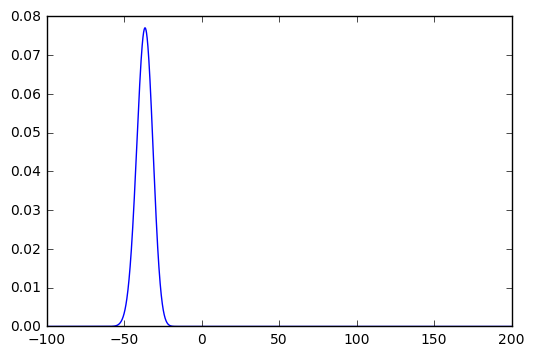

In [5]:
#Hyper what? Introducing Betas and 'Hyperparameters'

from scipy.stats import beta
import matplotlib.pyplot as plt

a = 55
b = 32
x = np.arange (-100, 200, 0.1)
y = beta.pdf(x, a, b, scale=100, loc=-100)
plt.plot(x,y)
plt.show()

